%pip install pandas seaborn matplotlib sikit-learn nltk category_encoders pickle

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def handle(e):
    print("Exception raised in " + e)

In [3]:

def read_csv(path):
    try:
        if('csv' == path.split(".")[-1]):
            data = pd.read_csv(path)
        else:
            print("The files is not a CSV file")
    except Exception as e:
        handle('file reading')
    return data


In [4]:
data = read_csv('data/fake_job_train.csv')
print(data.columns.values)
# print(len(data.columns.values))
rows = data.shape[0]
cols = data.shape[1]

print(f"This dataset has \033[1m {rows} rows\033[0m and \033[1m{cols} columns \033[0m.")

['job_id' 'title' 'location' 'department' 'salary_range' 'company_profile'
 'description' 'requirements' 'benefits' 'telecommuting'
 'has_company_logo' 'has_questions' 'employment_type'
 'required_experience' 'required_education' 'industry' 'function'
 'fraudulent']
This dataset has  17344 rows and 18 columns .


In [5]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,5458,Project Manager - UK,"GB, LND,",NaN,NaN,"90 Seconds, the worlds Cloud Video Production ...",Our rapidly expanding business is looking for ...,What we expect from youYour key responsibility...,What you will get from usThrough being part of...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
1,14020,Front-End Engineer,"GB, LND, lo",Engineering,NaN,Money is a person-to-person money transfer app...,A great opportunity to be a part of a cross fu...,QualificationsDemonstrable experience in desig...,Remuneration: Salary &amp; Equity participatio...,0,1,0,Full-time,Associate,NaN,Financial Services,Engineering,0
2,7046,"Reservoir Engineer, A&D Advisor","US, OK, Oklahoma City",Acquisitions and Divesments,NaN,Valor Services provides Workforce Solutions th...,To support planned growth a leading E&amp;P is...,Ideal candidate will have the following experi...,Please contact me directly to have a confident...,0,1,1,Full-time,Director,Master's Degree,Oil & Energy,Finance,0
3,9647,Advanced Services SON Engineer,"GB, BIR, Birmingham",NaN,NaN,NaN,I am currently seeking for an AS SON Engineer ...,-&gt; 3-6+ years of Experience in Cellular Tec...,NaN,0,0,0,Contract,Associate,Unspecified,NaN,Engineering,0
4,11310,Web Developer,"US, CA, Santa Monica",NaN,NaN,We’re always looking for highly motivated “fou...,We’re hiring a talented full time in-house web...,Our ideal candidate should possess the followi...,"It’s no secret that we work hard, but we also ...",0,1,1,Full-time,Entry level,Unspecified,Internet,Engineering,0


##### NUll Values in Dataset

In [6]:
[[features, data[features].isnull().sum()] for features in data.columns if data[features].isnull().sum() > 0]

[['location', np.int64(337)],
 ['department', np.int64(11198)],
 ['salary_range', np.int64(14567)],
 ['company_profile', np.int64(3217)],
 ['description', np.int64(1)],
 ['requirements', np.int64(2627)],
 ['benefits', np.int64(6999)],
 ['employment_type', np.int64(3375)],
 ['required_experience', np.int64(6846)],
 ['required_education', np.int64(7861)],
 ['industry', np.int64(4755)],
 ['function', np.int64(6276)]]

#### Heatmap of Missing Values

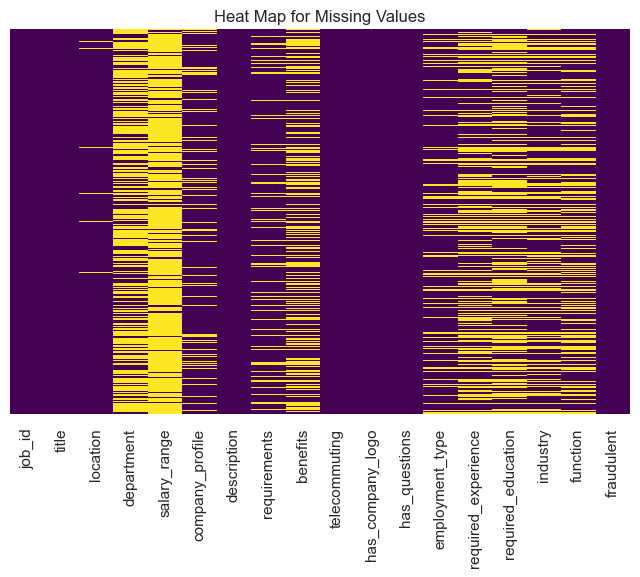

In [7]:
fig = sns.set(rc={'figure.figsize': (8, 5)})
plt.title("Heat Map for Missing Values")
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

Droping unnecessary Columns

In [8]:
columns = ['telecommuting','has_company_logo','has_questions','salary_range','employment_type']
# columns = ['company_profile', 'requirements','benefits', 'telecommuting','has_company_logo', 'has_questions',
#                           'required_experience', 'required_education','industry', 'function']

# data = data.drop(columns=['company_profile', 'requirements','benefits', 'telecommuting','has_company_logo', 'has_questions',
#                           'required_experience', 'required_education','industry', 'function'])
for col in columns:
    del data[col]
# print(data.columns.values)
# print(len(data.columns.values))
data.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,5458,Project Manager - UK,"GB, LND,",NaN,"90 Seconds, the worlds Cloud Video Production ...",Our rapidly expanding business is looking for ...,What we expect from youYour key responsibility...,What you will get from usThrough being part of...,NaN,NaN,NaN,NaN,0
1,14020,Front-End Engineer,"GB, LND, lo",Engineering,Money is a person-to-person money transfer app...,A great opportunity to be a part of a cross fu...,QualificationsDemonstrable experience in desig...,Remuneration: Salary &amp; Equity participatio...,Associate,NaN,Financial Services,Engineering,0
2,7046,"Reservoir Engineer, A&D Advisor","US, OK, Oklahoma City",Acquisitions and Divesments,Valor Services provides Workforce Solutions th...,To support planned growth a leading E&amp;P is...,Ideal candidate will have the following experi...,Please contact me directly to have a confident...,Director,Master's Degree,Oil & Energy,Finance,0
3,9647,Advanced Services SON Engineer,"GB, BIR, Birmingham",NaN,NaN,I am currently seeking for an AS SON Engineer ...,-&gt; 3-6+ years of Experience in Cellular Tec...,NaN,Associate,Unspecified,NaN,Engineering,0
4,11310,Web Developer,"US, CA, Santa Monica",NaN,We’re always looking for highly motivated “fou...,We’re hiring a talented full time in-house web...,Our ideal candidate should possess the followi...,"It’s no secret that we work hard, but we also ...",Entry level,Unspecified,Internet,Engineering,0


#### Filling NaN values with Blank space

In [9]:
data.fillna('', inplace=True)

### Exploratory Data Analysis
#### Comparing Number of Fraudlent and Non-Fraudlent Job Posting

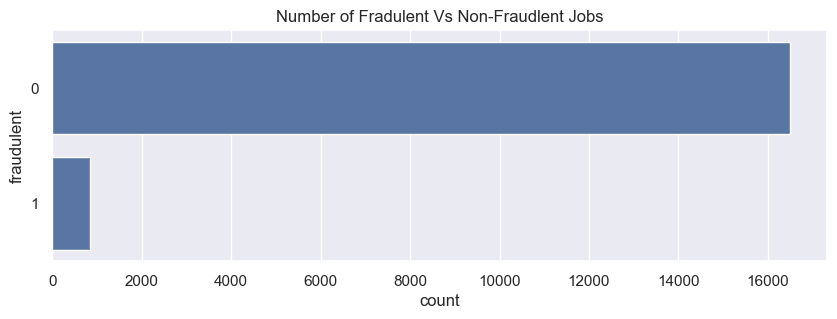

In [10]:
fig = sns.set(rc={'figure.figsize': (10, 3)})
plt.title("Number of Fradulent Vs Non-Fraudlent Jobs")
sns.countplot(y='fraudulent', data=data)
plt.show()

In [11]:
not_fraudulent = data.groupby('fraudulent')['fraudulent'].count()[0]
fraudulent = data.groupby('fraudulent')['fraudulent'].count()[1]

print(f"\033[1m {not_fraudulent}\033[0m jobs are \033[1mNOT Fraudulent\033[0m and \033[1m{fraudulent}\033[0m jobs are \033[1mFraudulent\033[0m.")

 16502 jobs are NOT Fraudulent and 842 jobs are Fraudulent.


#### Experiencewise Count

In [12]:
exp = dict(data.required_experience.value_counts())
del exp['']

exp_df = pd.DataFrame.from_dict(exp, orient ='index') 
exp_df.T

,Mid-Senior level,Entry level,Associate,Not Applicable,Director,Internship,Executive
0,3696,2621,2228,1074,374,367,138


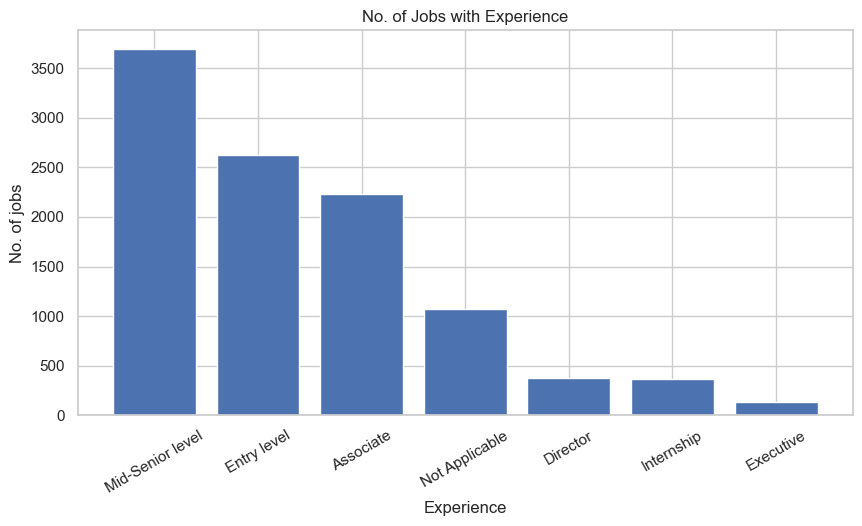

In [13]:
fig = sns.set(rc={'figure.figsize': (10, 5)})
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(),exp.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience')
plt.ylabel('No. of jobs')
plt.xticks(rotation=30)
plt.show()

#### Countrywise Job Count

In [14]:
# First Spliting location Column to extract Country Code
def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)

data.head()

,job_id,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,5458,Project Manager - UK,"GB, LND,",,"90 Seconds, the worlds Cloud Video Production ...",Our rapidly expanding business is looking for ...,What we expect from youYour key responsibility...,What you will get from usThrough being part of...,,,,,0,GB
1,14020,Front-End Engineer,"GB, LND, lo",Engineering,Money is a person-to-person money transfer app...,A great opportunity to be a part of a cross fu...,QualificationsDemonstrable experience in desig...,Remuneration: Salary &amp; Equity participatio...,Associate,,Financial Services,Engineering,0,GB
2,7046,"Reservoir Engineer, A&D Advisor","US, OK, Oklahoma City",Acquisitions and Divesments,Valor Services provides Workforce Solutions th...,To support planned growth a leading E&amp;P is...,Ideal candidate will have the following experi...,Please contact me directly to have a confident...,Director,Master's Degree,Oil & Energy,Finance,0,US
3,9647,Advanced Services SON Engineer,"GB, BIR, Birmingham",,,I am currently seeking for an AS SON Engineer ...,-&gt; 3-6+ years of Experience in Cellular Tec...,,Associate,Unspecified,,Engineering,0,GB
4,11310,Web Developer,"US, CA, Santa Monica",,We’re always looking for highly motivated “fou...,We’re hiring a talented full time in-house web...,Our ideal candidate should possess the followi...,"It’s no secret that we work hard, but we also ...",Entry level,Unspecified,Internet,Engineering,0,US


In [15]:
countr = dict(data.country.value_counts()[:14])
del countr['']
countr

countr_df = pd.DataFrame.from_dict(countr, orient ='index') 
countr_df.T

,US,GB,GR,CA,DE,NZ,IN,AU,PH,NL,BE,IE,SG
0,10326,2318,912,444,364,317,272,208,130,125,116,114,76


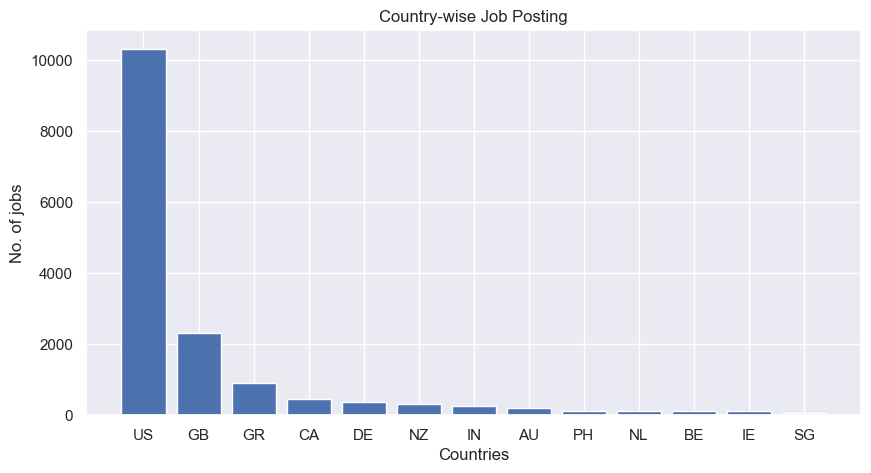

In [16]:
fig = sns.set(rc={'figure.figsize': (10, 5)})
plt.title('Country-wise Job Posting')
plt.bar(countr.keys(), countr.values())
plt.ylabel('No. of jobs')
plt.xlabel('Countries')
plt.show()

#### Education Job Count

In [17]:
edu = dict(data.required_education.value_counts()[:7])
del edu['']
edu

edu_df = pd.DataFrame.from_dict(edu, orient ='index') 
edu_df.T

,Bachelor's Degree,High School or equivalent,Unspecified,Master's Degree,Associate Degree,Certification
0,5001,2022,1347,398,269,162


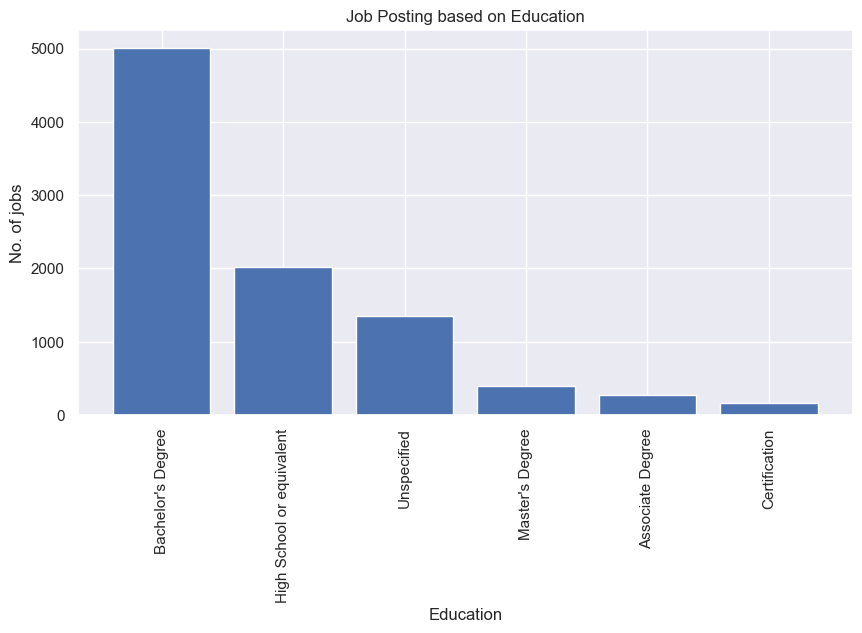

In [18]:
fig = sns.set(rc={'figure.figsize': (10, 5)})
plt.title('Job Posting based on Education')
plt.bar(edu.keys(), edu.values())
plt.ylabel('No. of jobs')
plt.xlabel('Education')
plt.xticks(rotation=90)
plt.show()

#### Top 10 Titles of Jobs Posted which were NOT fraudulent

In [19]:
print(data[data.fraudulent==0].title.value_counts()[:10])

title
English Teacher Abroad                                307
Graduates: English Teacher Abroad (Conversational)    142
Customer Service Associate                            142
English Teacher Abroad                                 90
Software Engineer                                      82
English Teacher Abroad (Conversational)                75
Customer Service Associate - Part Time                 73
Account Manager                                        71
Web Developer                                          64
Project Manager                                        60
Name: count, dtype: int64


#### Top 10 Titles of Jobs Posted which were fraudulent

In [20]:
print(data[data.fraudulent==1].title.value_counts()[:10])

title
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         20
Customer Service Representative                                         16
Administrative Assistant                                                15
Account Sales Managers $80-$130,000/yr                                  10
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Data Entry                                                               9
Name: count, dtype: int64


### Text Preprocessing

#### Handling missing values

In [21]:
def missing_values(data):
    print('Handling Missing Data')
    # print(data)
    # data =  data.iloc[[0]]
    # print(data)
    # print(data.to_numpy())
    try:
        # data['location'].fillna('no info', inplace = True)
        data['location'] = data['location'].fillna('no info')
        withoutcomma = data[~data['location'].str.contains(",", na=False)].index
        withcomma = data[data['location'].str.contains(",", na=False)].index
        data.loc[withcomma, 'country'] = data.loc[withcomma, 'location'].str.split(',').str[0].str.strip()
        data.loc[withoutcomma, 'country'] = data.loc[withoutcomma, 'location'].str.strip()
        """2.salary range"""

        # data['salary_range'].fillna('0-0', inplace = True)
        # data['salary_range'] = data['salary_range'].fillna('no info')

        # data.loc[data['salary_range'].str.contains(r'[a-zA-Z]', na=False), 'salary_range'] = '0-0'

        # # Extract minimum and maximum salary using regex
        # salary_split = data['salary_range'].str.extract(r'(\d+)-(\d+)')

        # # Assign extracted values
        # data['minimum_salary'] = salary_split[0].fillna(data['salary_range'])
        # data['maximum_salary'] = salary_split[1].fillna(data['salary_range'])


        """3. All other categorical columns and remaining numeric columns."""

        columns = data.columns
        for i in columns:
            if(data[i].isna().any()):
                if(data[i].dtypes == 'object'):
                    # data[i].fillna('no info', inplace = True)
                    data[i] = data[i].fillna('no info')
                    data[i] = data[i].str.lower()

                else:
                    # data[i].fillna(0, inplace = True)
                    data[i] = data[i].fillna(0)


        data.drop(['location'], axis = 1, inplace = True)
        # data.drop(['salary_range', 'location'], axis = 1, inplace = True)
        # print(data)
        return data
    except Exception as e:
        print('exceptions  ')
        print(e)
        handle('missing data handling process')


#### Text handling

In [22]:
# import nltk
# nltk.download('stopwords')

In [23]:
import re
import string
import math
import pandas as pd
from nltk.cluster import cosine_distance
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.corpus import wordnet
import category_encoders as ce
import pickle

In [24]:
def removeuncessary(text):
    try:
        '''
        1. removing punctuations,
        2. removing numbered words,
        3. removing unknown characters

        '''
        text = re.sub('[%s]'%re.escape(string.punctuation), '', str(text))
        text = re.sub('\w*\d\w*', '', str(text))
        text = re.sub('[^a-zA-Z ]+', ' ', str(text))

        return text
    except Exception as e:
        handle('removing unnecessary text')


<>:10: SyntaxWarning: invalid escape sequence '\w'
<>:10: SyntaxWarning: invalid escape sequence '\w'
C:\Users\akhil\AppData\Local\Temp\ipykernel_20688\2064716351.py:10: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', str(text))


In [25]:
def stopwordsremove(text):
    stop_words = set(stopwords.words('english'))
    try:
        word_token = word_tokenize(text)
        ps = PorterStemmer()
        filtered = [ps.stem(w.lower())
                    for w in word_token if not w in stop_words]
        return filtered
    except Exception as e:
        # print('error in stopword removal')
        # print(e)
        handle('stop words removing')

In [26]:
def synonym_relation(text1, text2):
    try:
        if(text1 == 'no info' or text2 == 'no info'):
            return 0
        else:
            text1 = stopwordsremove(text1)
            text2 = stopwordsremove(text2)
            syn_set = set()
            count  = 0
            if(len(text1) == 0 or len(text2) == 0):
                return 0
            if(len(text1) < len(text2)):
                for word in text2:
                    for syn in wordnet.synsets(word):
                        for l in syn.lemmas():
                            syn_set.add(l.name())

                for word in text1:
                    if word in syn_set:
                            count += 1
                return (count / len(text1))
            else:
                for word in text1:
                    for syn in wordnet.synsets(word):
                        for l in syn.lemmas():
                            syn_set.add(l.name())

                for word in text2:
                    if word in syn_set:
                            count += 1
                return (count / len(text2))
    except Exception as e:
        # print(e)
        handle('synonym relation finding process')

In [27]:
def texthandling(data):
        print('Text Handling')
        # print(data)
        print(data.columns.values)
        # print(set(stopwords.words('english')))
        # return
        try:
            '''
            This function is for handling text data columns company profile,
            description, requirements, benefits are there is multiple text in
            those columns we need to do something about them.
            '''
            stop_words = set(stopwords.words('english'))
            for i in range(0, data.shape[0]):
                print('Text Handling : ', i)
                data.loc[i, 'company_profile'] = removeuncessary(data.loc[i,
                                                            'company_profile'])
                data.loc[i, 'description'] = removeuncessary(data.loc[i,
                                                                'description'])
                data.loc[i, 'requirements'] = removeuncessary(data.loc[i,
                                                               'requirements'])
                data.loc[i, 'benefits'] = removeuncessary(data.loc[i,
                                                                   'benefits'])
                data.loc[i, 'title'] = removeuncessary(data.loc[i, 'title'])
                data.loc[i, 'department'] = removeuncessary(data.loc[i,
                                                                 'department'])
                data.loc[i, 'industry'] = removeuncessary(data.loc[i,
                                                                   'industry'])
                data.loc[i, 'function'] = removeuncessary(data.loc[i,
                                                                   'function'])

                words = str(data.loc[i, 'company_profile'])
                if(words == 'no info'):
                    data.loc[i, 'company_profile_word_count'] = 0
                else:
                    data.loc[i, 'company_profile_word_count'] = len(
                                                                 words.split())

                words = str(data.loc[i, 'benefits'])
                if(words == 'no info'):
                    data.loc[i, 'benefits_word_count'] = 0
                else:
                    data.loc[i, 'benefits_word_count'] = len(words.split())

                data.loc[i, 'title_and_job_similarity'] = synonym_relation(
                                data.loc[i, 'title'], data.loc[i,
                                                                'description'])

                data.loc[i, 'title_and_req_similarity'] = synonym_relation(
                                data.loc[i, 'title'], data.loc[i,
                                                               'requirements'])

                data.loc[i, 'profile_and_job_similarity'] = synonym_relation(
                       data.loc[i, 'company_profile'], data.loc[i,
                                                                'description'])

                data.loc[i, 'profiel_and_req_similarity'] = synonym_relation(
                      data.loc[i, 'company_profile'], data.loc[i,
                                                               'requirements'])

                data.loc[i,
                'title_and_department_syn_similarity'] = synonym_relation(
                               data.loc[i, 'title'], data.loc[i, 'department'])

                data.loc[i,
                'title_and_industry_syn_similarity'] = synonym_relation(
                                  data.loc[i, 'title'],data.loc[i, 'industry'])

                data.loc[i,
                'title_and_function_syn_similarity'] = synonym_relation(
                                 data.loc[i, 'title'], data.loc[i, 'function'])

                data.loc[i,
                'industry_and_department_syn_similarity'] = synonym_relation(
                            data.loc[i, 'industry'], data.loc[i, 'department'])

                data.loc[i,
                'function_and_department_syn_similarity'] = synonym_relation(
                            data.loc[i, 'function'], data.loc[i, 'department'])
                data.loc[i,
                'industry_and_function_syn_similarity'] =synonym_relation(
                              data.loc[i, 'industry'], data.loc[i, 'function'])

            for i in ['title_and_job_similarity', 'title_and_req_similarity',
                    'profile_and_job_similarity', 'profiel_and_req_similarity',
                    'title_and_department_syn_similarity',
                    'title_and_industry_syn_similarity',
                    'title_and_function_syn_similarity',
                    'function_and_department_syn_similarity',
                    'industry_and_department_syn_similarity',
                    'industry_and_function_syn_similarity']:

                    # data[i].fillna(0, inplace = True)
                    data[i] = data[i].fillna(0)


            data.drop(['company_profile', 'benefits', 'description',
                       'requirements', 'title', 'department', 'industry',
                       'function',], axis = 1, inplace = True)
            return data
        except Exception as e:
            print(e)
            handle('Text handling process')



In [28]:
def categorical_cols_train(data):
    try:
        print('Categorical Encoding')
        # encoder = ce.BinaryEncoder(cols = ['employment_type',
        #   'required_experience', 'required_education', 'country'])
        encoder = ce.BinaryEncoder(cols = [
          'required_experience', 'required_education', 'country'])
        newdata = encoder.fit_transform(data)
        pickle.dump( encoder, open( "model/encoder.p", "wb" ) )
        return newdata
    except Exception as e:
        print(e)
        handle('categorical column handling')

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def train_and_save_model(data):
    try:
        print("Model Training")
        X_train = data.drop('fraudulent', axis = 1)
        y_train = data['fraudulent']
        # print(X_train)
        # print(y_train)
        print('ytrain imbalance')
        print(y_train.value_counts(normalize=True))
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        pickle.dump( sc, open( "model/scaler.p", "wb" ))


        # param_grid = {
        #     'n_estimators': [100, 200, 300, 500],  # Number of trees
        #     'max_depth': [10, 20, 30, None],  # Tree depth (None = expand fully)
        #     'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
        #     # 'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
        #     # 'max_features': ['sqrt', 'log2', None],  # Number of features to consider per split
        #     # 'bootstrap': [True, False],  # Bootstrap sampling
        #     # 'criterion': ['gini', 'entropy'],  # Splitting function
        #     'class_weight': [None, 'balanced']  # Handle class imbalance
        # }

        # rf = RandomForestClassifier(random_state=42)
        # grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
        # grid_search.fit(X_train, y_train)
        # print("Best Parameters:", grid_search.best_params_)

        regressionModel = LogisticRegression(randomState=0).fit(X_train, y_train)
        filename = 'model/reg_model.p'
        pickle.dump(regressionModel, open(filename, 'wb'))

        
        model = RandomForestClassifier(n_estimators = 300 ,
                                        max_depth=None, 
                                        min_samples_split=10, 
                                       criterion = 'entropy',
                                       class_weight='balanced',
                                       random_state = 1)

        model.fit(X_train, y_train)

        filename = 'model/finalized_model.p'
        pickle.dump(model, open(filename, 'wb'))
    except Exception as e:
        print(e)
        handle('Model Creation and training')

### Calling the function

In [30]:
fixedMis = missing_values(data)

Handling Missing Data


In [31]:
newData = data.sample(50)
# print(newData.columns.values)
# print(len(newData.columns.values))
# newData.head()
# texthandling(newData)
handledText =texthandling(fixedMis)

Text Handling
['job_id' 'title' 'department' 'company_profile' 'description'
 'requirements' 'benefits' 'required_experience' 'required_education'
 'industry' 'function' 'fraudulent' 'country']
Text Handling :  0
Text Handling :  1
Text Handling :  2
Text Handling :  3
Text Handling :  4
Text Handling :  5
Text Handling :  6
Text Handling :  7
Text Handling :  8
Text Handling :  9
Text Handling :  10
Text Handling :  11
Text Handling :  12
Text Handling :  13
Text Handling :  14
Text Handling :  15
Text Handling :  16
Text Handling :  17
Text Handling :  18
Text Handling :  19
Text Handling :  20
Text Handling :  21
Text Handling :  22
Text Handling :  23
Text Handling :  24
Text Handling :  25
Text Handling :  26
Text Handling :  27
Text Handling :  28
Text Handling :  29
Text Handling :  30
Text Handling :  31
Text Handling :  32
Text Handling :  33
Text Handling :  34
Text Handling :  35
Text Handling :  36
Text Handling :  37
Text Handling :  38
Text Handling :  39
Text Handling : 

KeyboardInterrupt: 

In [ ]:
catecols= categorical_cols_train(handledText)

Categorical Encoding


In [ ]:
train_and_save_model(catecols)

Model Training
ytrain imbalance
fraudulent
0    0.951453
1    0.048547
Name: proportion, dtype: float64
